# Computational assignment 2

# TO DO 

- få til overdamped (analytisk stemmer ikke med numerisk) FIKSET???
- skriv om hvordan vi finner C for critical damping (initialbetingelsen omega0 = 0)
- skriv om analytisk løsning 
- kommenter oppgave 1: MANGLER: evt mer utledning av analytisk løsning, mer kommentarer til plottene (se teksten). SIGRID: Gjerne kontroller at det jeg har skrevet gir mening :)))


OPPGAVE 2:
-RYDD
-Tekst til oppgave 2
-Can you relate the resonance observed to the physical parameters of our pendulum?
-Sammenligne med analytisk løsning


## 1) Damped harmonic motion of a pendulum


# må sikkert skrive om utleding av analytisk løsning??

For a pendulum without damping, the equation of motion is $\frac{d^2 \theta}{dt^2}=-\frac{g}{l}\theta$. A damped pendulum is affected by a damping force proportiaonal to the velocity, which gives the last term in the equation of motion for a damped pendulum: $\frac{d^2 \theta}{dt^2}=-\frac{g}{l}\theta-q\frac{d\theta}{dt}$.

For an underdamped pendulum, the solution for the differential equation is $\theta(t)=\theta_0e^{-qt/2}sin(\sqrt{\Omega^2-q^2/4}t+\phi)$.

An overdamped pendulum gives the solution $\theta(t)=\theta_0e^{-(q/2\pm \sqrt{q^2/4-\Omega^2})t}$.

The boundary between an underdamped and an overdamped pendulum is called a critically damped pendulum, and it has the solution $\theta(t)=(\theta_0+Ct)e^{-qt/2}$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc

In [2]:
"plotting parameters "
fontsize=15
newparams = {'axes.titlesize': fontsize, 'axes.labelsize': fontsize, 
             'figure.titlesize':20,
             'lines.linewidth': 2, 'lines.markersize': 7,
             'figure.figsize': (20, 5), 'ytick.labelsize': fontsize,
             'xtick.labelsize': fontsize, 'legend.fontsize': fontsize,
            'legend.handlelength': 1.0}

plt.rcParams.update(newparams)

In [3]:
"""Defining functions"""
#Runge Kutta 
def Kutta4(f,t0,y0,h,nsteps,q=1,omega_D=1):
    Y=np.zeros((nsteps,2))  #2D array. Y[:,0] is theta values and Y[:,1] is omega values 
    Y[0]=y0 #initial values
    
    T=np.linspace(t0, t0 + h*nsteps, nsteps) #array of time values 
    
    for i in range(nsteps-1): 
        t=i*h
        F1= f(Y[i],t,q,omega_D)
        F2= f(Y[i] + h/2* F1,t,q,omega_D)
        F3= f(Y[i] + h/2* F2,t,q,omega_D)
        F4= f(Y[i] + h*F3,t,q,omega_D)
        
        Y[i+1]= Y[i] + h/6*(F1+2*F2+2*F3+F4) #calculating the new theta and omega values
        
    return Y,T #return array of theta and omega values, and time list


#finds the total energy per unit mass 
def total_energy(theta, omega,l): 
    E=np.zeros(len(theta)) #array of energy values 
    for i in range(len(theta)):
        E[i] = 1/2*l**2*(omega[i]**2+g/l*theta[i]**2) #calculating the energy based on theta and omega values 
    return E

MANGLER: tolke theta for overdamped pendulum, mer om energi 

The plots to the left below show the angle $\theta$ as a function of time for an underdamped, an overdamped and a critically damped pendulum. The plots include both the numerical and the analytical solutions, which matches well . The plots to the right show the work done by damping as a function of time. The energy is decreasing with time for all three pendulums, which makes sense physically. The energy plot has terrace points for the underdamped pendulum where the velocity is zero (at the maximum and minimum values of theta). 

As illustrated by the plot, the underdamped pendulum has an oscillatory motion, with an amplitude that decays with time. 

The critically damped pendulum starts out as half a sinus wave, but stops when $\theta$ reaches 0. 

6.2631142413339385


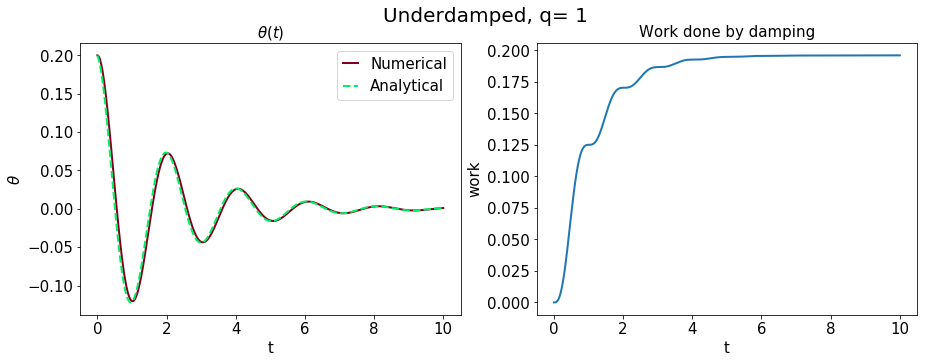

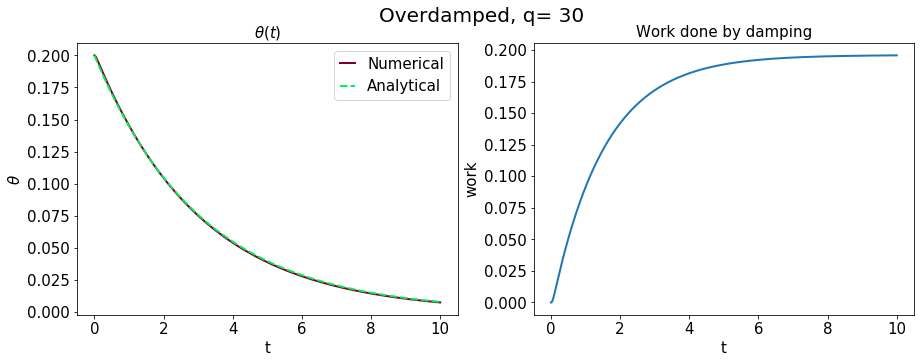

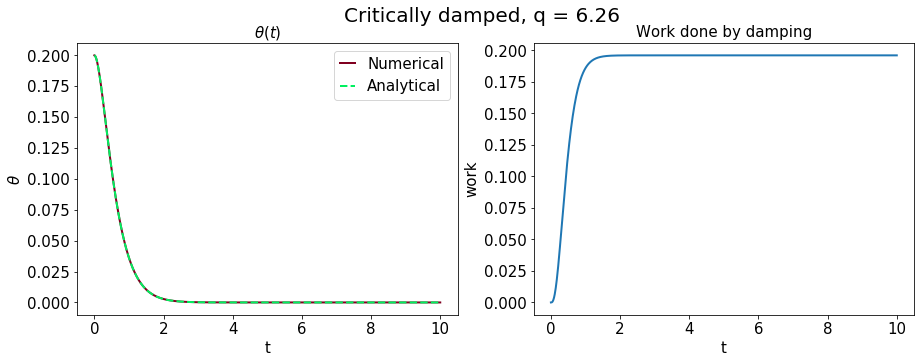

In [4]:

"""Defining constants and initial values"""
q0=1 
delta_t=0.01 #value for each timestep
nsteps =int(10/delta_t) #number of timesteps
theta0 = 0.2 #initial value of the anlge theta
omega0 = 0 #inital value for the pendulums angular velocity 
x0 = np.array([theta0,omega0]) #array of the initial values
g=sc.g
l=1
phi = np.pi/2 #phase shift

#Function to be used in Runge Kutta
#takes in array of theta and the derivative of theta
#returns array of the derivative of theta and the double derivative of theta
def f_damped(w,t,q,omega_D):
    return np.array([w[1],-g/l*w[0]-q*w[1]])    

print(np.sqrt(4*g/l))

#plotting theta and work
def plot_damped(q,analytic_sol,title): 
    x,t = Kutta4(f_damped,0,x0,delta_t,nsteps,q) 
    theta=x[:,0] #list of values of theta
    omega=x[:,1] #list of values of derivative of theta
    energy=total_energy(theta, omega,l) 
    E0=energy[0] #energy at t=0
    work=-energy+E0 #total work done is the initial energy minus the current energy
    theta_a=analytic_sol(t,q) #analytic solution for theta
    
    f,axs=plt.subplots(2,2,figsize=(15,5)) #making two subplots
    plt.subplot(1,2,1)
    plt.suptitle(title) #title for both plots
    plt.title(r'$\theta (t)$')
    plt.ylabel(r"$ \theta $")
    plt.xlabel("t")
    plt.plot(t,theta,color='#800020',label="Numerical")
    plt.plot(t,theta_a,color='#00f060',linestyle = '--' ,label="Analytical")
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title("Work done by damping")
    plt.ylabel("work")
    plt.xlabel("t")
    plt.plot(t,work)

    
#analytic solution for underdamped pendulum
def analytic_sol_u(t,q):
    return theta0 * np.exp(-q*t/2) * np.sin(np.sqrt(g/l - q**2/4)*t + phi )
    
#analytic solution for overdamped pendulum 
def analytic_sol_o(t,q):  ##pluss eller minus???????????????
    exp_fact= (q/2 - np.sqrt(q**2/4 + g/l))
    return theta0 * np.exp(exp_fact*t)
    return theta0 * np.exp(-(q/2 - np.sqrt(q**2/4 + g/l))*t)
    #return theta0 * np.exp( -(q/2 + np.sqrt(q**2/4 + g/l))*t)

#Analytic solution for critically damped pendulum
def analytic_sol_c(t,q): ###Hva er C ???????????????????
    C=theta0*q/2   #hva i all verden er denne????
    return (theta0 + C*t ) * np.exp(-q*t/2)
    
    

"""Plotting"""
"""Underdamped  q^2 < 4g/l  """
q_u=1
plot_damped(q_u,analytic_sol_u,"Underdamped, q= " + str(q_u))

"""Overdamped q^2>4g/l"""
q_o=30
plot_damped(q_o,analytic_sol_o,"Overdamped, q= " + str(q_o))

"""Critically damped q"""
q_c=np.sqrt(4*g/l)
plot_damped(q_c,analytic_sol_c,"Critically damped, q = " + str( round (q_c,2)))


## 2) Forced harmonic (damped) pendulum 

SHOW NUMERICALLY THE EXISTENCE OF RESONANCE FOR THIS PROBLEM!!
(Hvordan skal vi gjøre det?)

If we have an external driving force that is sinusoidal in time, the equation of motion gets an additional term, and becomes $\frac{d^2\theta}{dt^2}=-\frac{g}{l}\theta-q\frac{d\theta}{dt}+F_Dsin(\Omega_Dt)$. This equation has the steady state solution $\theta=\theta_0sin(\Omega_dt+\phi)$, with an amplitude given by $\theta_0=\frac{F_d}{\sqrt{(\Omega^2-\Omega_D^2)^2+(q\Omega_D)^2}}$. From this formula we see that the resonant amplitude is dependent on $q$ and $\Omega_D$. Resonance occurs if $\Omega_D\approx\Omega$, which gives $\theta_0\approx\frac{F_d}{q\Omega_d}$

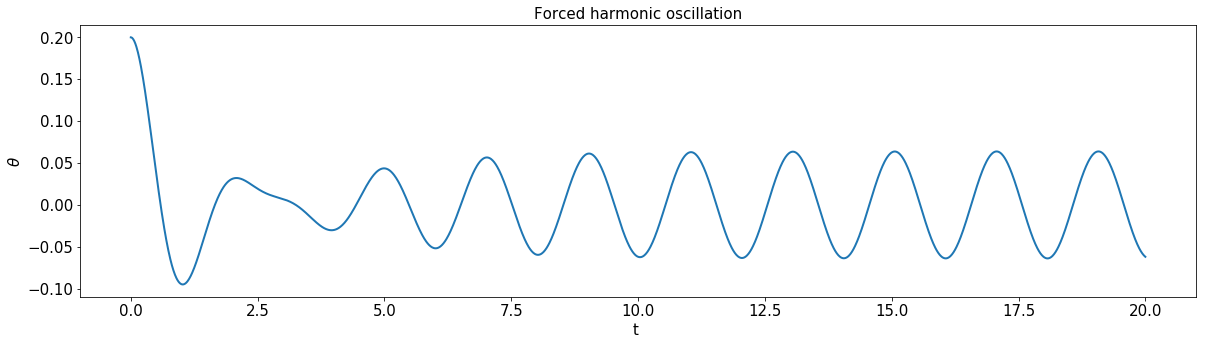

In [5]:

nsteps_f= int(20/delta_t) #number of timesteps
Fd = 0.2 #default value for driving force
Omega_D = np.sqrt(g/l)  #resonance frequency
q0=1

#function f to be used in Runge Kutta, now with the additional force term
def f_forced(w,t,q,omega_D):
    return np.array([w[1],-q*w[1]-g/l*w[0]+Fd*np.sin(omega_D*t)])

#calculating using Runge Kutta
x_forced, t = Kutta4(f_forced,0,x0,delta_t,nsteps_f,q0,Omega_D)
theta_forced=x_forced[:,0]


#plotting harmonic forced oscillation 
plt.title("Forced harmonic oscillation")
plt.xlabel("t")
plt.ylabel("$\theta$") 
plt.plot(t,theta_forced)
plt.ylabel(r'$\theta$')
plt.xlabel('t ')
plt.show()



The plot below shows how the resonance amplitude varies with respect to $\Omega_D$.

In [11]:
"""Dependence of Omega_D"""
nsteps_omega_D = 4000


#skal finne resonans amplituden
def resonant_amplitude(theta_list):
    midle_of_list= int(nsteps_f/4*3)
    return np.max(theta_list[midle_of_list:])

def analytic_resonant_amplitude(Fd,omegaD=Omega_D,q=q0):
    return Fd/np.sqrt( (g/l - omegaD**2)**2 + (q*omegaD)**2 )
    
#list_of_omega_D = np.linspace(0.5,10,100) 
list_of_omega_D = np.linspace(1,10,50) ###tester bare SLETT DENNE TIL SLUTT!!!!
amplitudes_omega_D=np.zeros(len(list_of_omega_D))

for i in range(len(list_of_omega_D)):
    omega_i = list_of_omega_D[i]
    x_i, t= Kutta4(f_forced,0,x0,delta_t,nsteps_omega_D,q0,omega_i)
    theta_i = x_i[:,0]
    amplitudes_omega_D[i] = resonant_amplitude(theta_i)
    


Below is a plot of the resonance amplitude as a function of $\Omega_D$, computed both numerically and analytically. The numerical and analytical solutions match well. 

The dotted vertical line shows where $\Omega_D=\Omega$. When $\Omega_D\approx\Omega$, the resonance value is relatively large.  

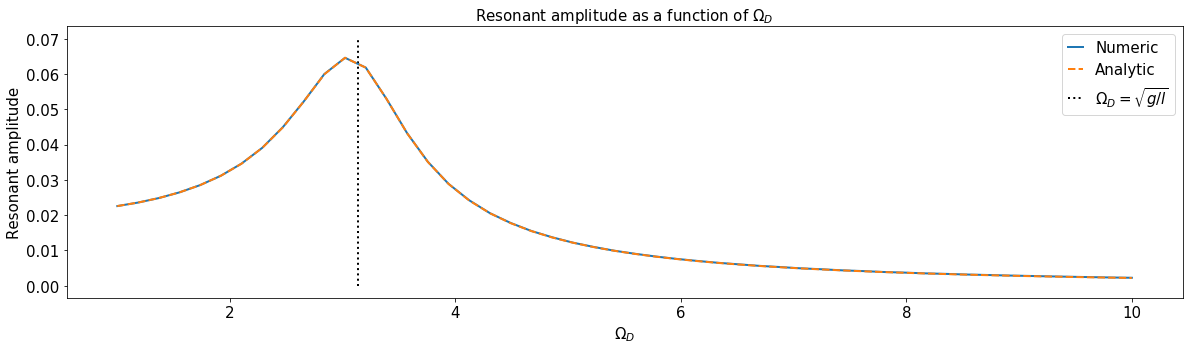

In [13]:
"""test for å finne ut hvor stor tidsintervall vi må ha"""
analytic_ra_omega_D = analytic_resonant_amplitude(Fd,omegaD=list_of_omega_D)
    

    
plt.title(r"Resonant amplitude as a function of $\Omega_D$")
plt.plot(list_of_omega_D,amplitudes_omega_D, label = 'Numeric')
plt.plot(list_of_omega_D,analytic_ra_omega_D, linestyle='--', label = "Analytic" )
plt.xlabel(r'$\Omega_D$')
plt.ylabel('Resonant amplitude')
plt.vlines(np.sqrt(g/l),0,0.07,linestyle=':', label = r'$\Omega_D = \sqrt{g/l}$' )
plt.legend()
plt.show()




The plot below shows how the resonant amplitude varies with respect to the friction parameter q. As mentioned above,  if $\Omega_D\approx\Omega$, as is the case here, we have $\theta_0\approx\frac{F_d}{q\Omega_d}$. This means that the resonant amplitude decreases with a factor $\frac{constant}{q}$, in accordance with the plot below. 

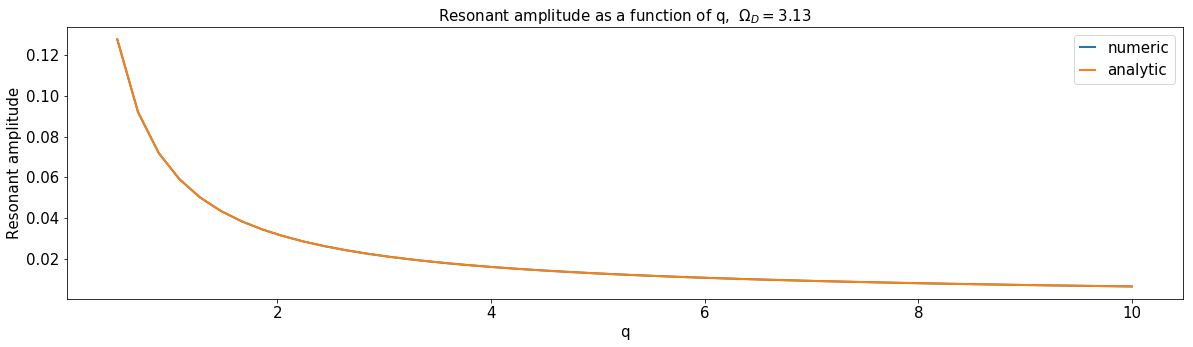

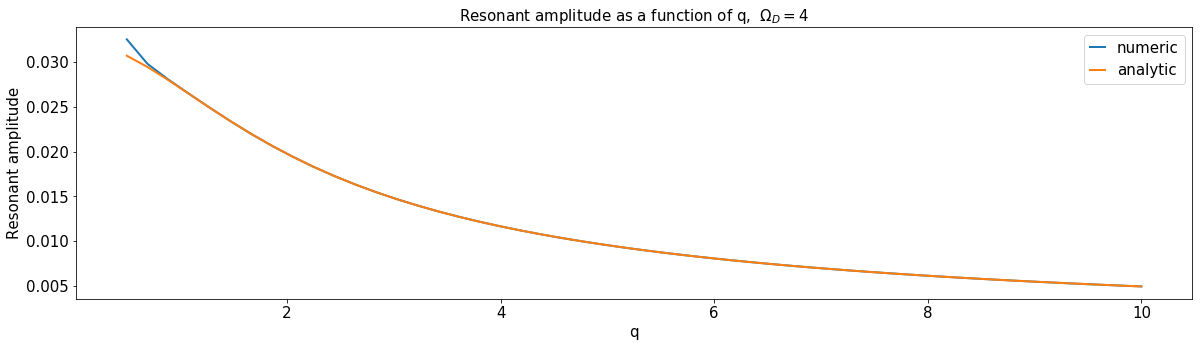

In [14]:
"Dependence of q"

Omega_D_q = Omega_D

#plotting the resonant amplitude as a function of q
def plot_resonant_amp_afo_q(Omega_D_q):
    qlist=np.linspace(0.5,10,50)
    Amplitudes_qi=np.zeros(len(qlist))

    for i in range(len(qlist)):
        qi = qlist[i]
        x_i, t= Kutta4(f_forced,0,x0,delta_t,nsteps_omega_D,qi,Omega_D_q)
        theta_i = x_i[:,0]
        Amplitudes_qi[i] = resonant_amplitude(x_i[:,0])

    analytic_ra_q = analytic_resonant_amplitude(Fd,Omega_D_q,qlist)

    plt.title(r"Resonant amplitude as a function of q,  $\Omega_D =$" + str(round(Omega_D_q,2)))
    plt.xlabel("q")
    plt.ylabel("Resonant amplitude")
    plt.plot(qlist,Amplitudes_qi,label='numeric')
    plt.plot(qlist,analytic_ra_q,label = 'analytic')
    plt.legend()
    plt.show()
    
plot_resonant_amp_afo_q(Omega_D)
plot_resonant_amp_afo_q(4)